In [1]:
import unidip
import dip
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
peak = np.random.normal(size=100)
peaks = np.random.normal(size=100, loc=0, scale=0.3)
peaks = np.concatenate((peaks-2.5, peaks, peaks+2.5))

In [3]:
peak = np.genfromtxt("peak.csv", delimiter=",")
peaks = np.genfromtxt("peaks.csv", delimiter=",")

In [3]:
def _test(dat, alpha=.05, plot=False, debug=False):
    """ test filename's.csv peakitude :) """
    from time import time
    print(f"length of test data: {len(dat)}")
    start = time()
    if debug:
        ints = unidip.unidip(dat, alpha=alpha, plotdat=dat)
    else:
        ints = unidip.unidip(dat, alpha=alpha)
    end = time()
    print(f"# intervals returned: {len(ints)}")
    for i in sorted(ints):
        print(i)
    print(f"time taken {end-start:.2f}sec\n")
    if plot:
        ax = plt.hist(dat, bins=50)
        plt.vlines(list(ints), 0, max(ax[0]))
        plt.show()

In [4]:
dat_S = np.random.normal(size=3)
dat_L = np.random.normal(size=200)
noise = np.random.uniform(-6, 40, size=2000)
tstdat = np.concatenate([dat_S, noise, dat_L])

_test(tstdat, plot=True)

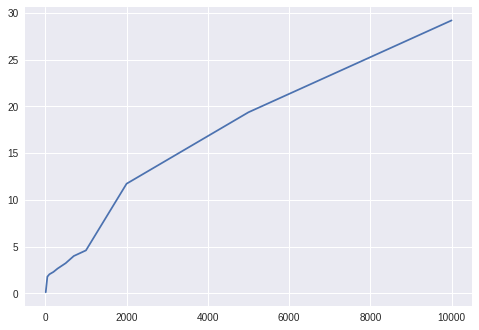

In [6]:
def time_func(ssizes):
    from time import time
    
    dtms = []
    for s in ssizes:
        peaks = np.random.normal(size=int(s/3), loc=0, scale=0.3)
        dat = np.concatenate((peaks, peaks-2.5, peaks+2.5))
        start = time()
        intervals = unidip.unidip(dat)
        end = time()
        dtms.append(end-start)
    plt.plot(ssizes, dtms)
    plt.show()   
    
time_func([10, 50, 100, 200, 300, 500, 700, 1000, 2000, 5000, 10000])

In [29]:
dat = np.random.randn(500)

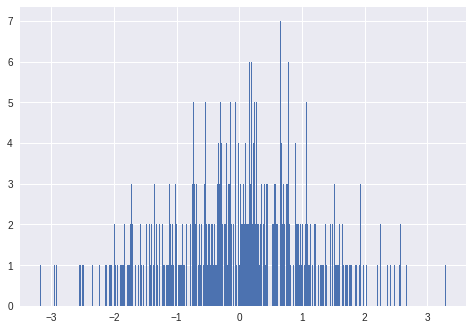

In [30]:
ax = plt.hist(dat, bins=500)
plt.show()

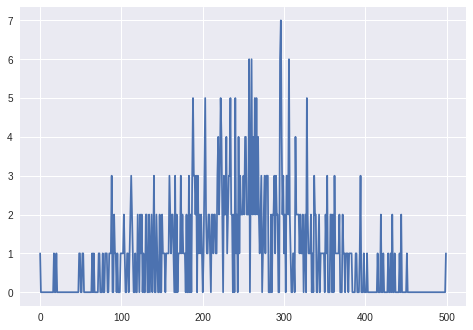

In [31]:
plt.plot(range(len(ax[0])), ax[0])
plt.show()

In [ ]:
dip.dip(idxs=dat)

In [ ]:
dip.dip(histogram=ax[0])

In [18]:
unifs = np.random.uniform(size=1000 * 100).reshape([1000, 100])
unifs2 = np.random.uniform(size=1000 * 100).reshape([1000, 100])

In [21]:
didx = np.apply_along_axis(dip.dip, 1, unifs, just_dip=True)
didx2 = np.apply_along_axis(dip.dip, 1, unifs2, just_dip=True)

In [25]:
dhis = np.apply_along_axis(lambda a,b: dip.dip(histogram=a, just_dip=b), 1, unifs, True)
dhis2 = np.apply_along_axis(lambda a,b: dip.dip(histogram=a, just_dip=b), 1, unifs2, True)

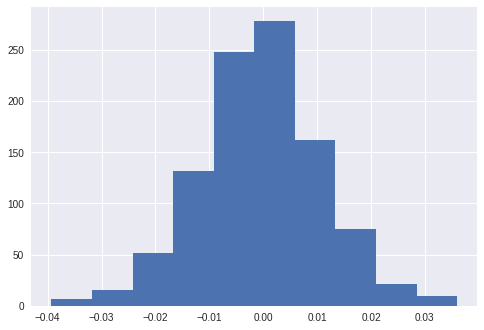

In [22]:
plt.hist(didx-didx2)
plt.show()

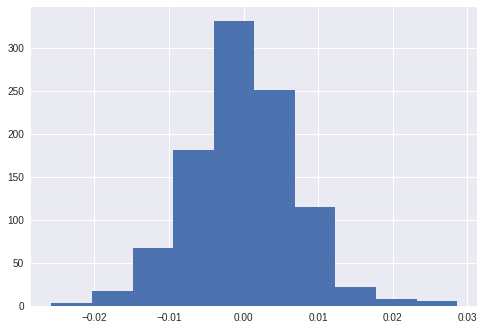

In [26]:
plt.hist(dhis-dhis2)
plt.show()

In [13]:
np.less(didx-dhis, 0).sum() / dhis.shape[0]

0.075999999999999998